<a href="https://colab.research.google.com/github/jugernaut/Prometeo/blob/desarrollo/06_AnalisisNumerico/04_CuadraturaNumerica/04_CuadraturaDeGauss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math

<font color="Teal" face="Comic Sans MS,arial">
  <h1 align="center"><i>Cuadratura de Gauss (Continuación)</i></h1>
  </font>
  <font color="Black" face="Comic Sans MS,arial">
  <h5 align="center"><i>Profesora: 	Ursula Xiomara Iturrarán Viveros</i></h5>
    <h5 align="center"><i>Ayudante: Juan Pablo Cordero Santiago</i></h5>
  <h5 align="center"><i>Materia: Análisis Numérico</i></h5>
  </font>


Este sitio puede ser usado libremente, tanto por profesores como por estudiantes, que deseen complementar sus cursos y conocimientos en los temas antes mencionados. Los materiales están bajo una Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Licencia Creative Commons Atribución-NoComercial-CompartirIgual 4.0 Internacional</a>.

Trabajo realizado con el apoyo del Programa UNAM-DGAPA-PAPIME PE101019

# **Cuadratura Gaussiana**

Notemos que los coeficientes $A_{i}'s$ en la regla de integracíon:

$$\int_{a}^{b} f(x)dx \approx A_{0} f(x_{0}) + A_{1} f(x_{1}) +....+ A_{n}f(x_{n})$$

representan $n+1$ grados de libertad que pueden usarse para construir una regla exacta para polinomios de grado $n$ o menor.

$\color{blue}{La\ idea\ detr\acute{a}s\ de\ la\ Cuadratura\ Gaussiana}$

Las abscisas $x_{1},x_{2},...,x_{n}$ representan otros $n$ grados de libertad que pueden ser usadas para extender la exactitud de la regla de integración a polinomios de grado $2n-1$ o menores.

## Ejemplo 1: Aproximar

$$\int_{0}^{1} \frac{sin(\pi x)}{\pi x}$$

Por cuadratura Gaussiana de 3 puntos


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


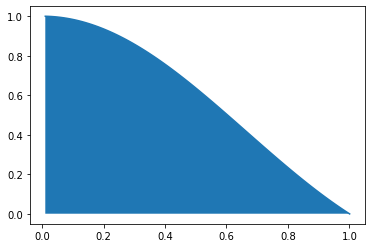

In [ ]:
x = np.linspace(0, 1.001, 100)
y1 = np.sin(np.pi*x)/(np.pi*x)
plt.fill_between(x, y1)
plt.plot(x, y1)
plt.show()

**Observación:** $f(0)=1$

## Cuadratura Gaussiana de 3 puntos

$\color{blue}{1}$ Cambio de intervalo de $[1,0]$ a $[-1,1]$

$$\int_{0}^{1} f(x)dx = \int_{-1}^{1} \lambda' (t) f(\lambda (t))dt$$

$\lambda (t)$ es recta tal que $\lambda(-1)=0$ y $\lambda(1)=1$

\begin{array}{cc}
\lambda & = & \frac{\lambda(1)-\lambda(-1)}{1-(-1)}(t-(-1))+\lambda(-1)\\ 
& = & \frac{1}{2} (t+1)\\ 
\lambda'(t) & = & \frac{1}{2} 
\end{array}

$\color{blue}{1}$ Cambio de intervalo de $[1,0]$ a $[-1,1]$

Así

$$\int_{0}^{1} f(x) dx = \frac{1}{2} \int_{-1}^{1} f \left( \frac{1}{2}t + \frac{1}{2} \right) dt$$

$\color{blue}{2}$ La forma de la cuadratura

Cuadratura en el intervalo $[-1,1]$ queda de la forma

$$\int_{-1}^{1} \text{funci$\acute{o}$n}(t)dt \approx \omega_{1} \cdot \text{funci$\acute{o}$n}(t_{1}) + \omega_{2} \cdot \text{funci$\acute{o}$n}(t_{2}) +  \omega_{3} \cdot \text{funci$\acute{o}$n}(t_{3})$$

pesos $\omega_{1},\omega_{2},\omega_{3}$

$\color{blue}{2}$ La forma de la cuadratura

Cuadratura en el intervalo $[-1,1]$

<center>
<img src="https://github.com/jugernaut/Prometeo/blob/desarrollo/Figuras/CG3.png?raw=1" width="600"> 
</center>

pesos $\omega_{1},\omega_{2},\omega_{3}$

nodos $t_{1},t_{2},t_{3}$

$\color{blue}{2}$ Con un cambio de variable la forma de la cuadratura en el intervalo $[-1,1]$ es:    

$$\int_{0}^{1} \frac{sin(\pi x)}{\pi x} dx \approx \frac{1}{2} \left[ \omega_{1} \frac{sin\left( \left( \frac{1}{2}t_{1}+\frac{1}{2} \right) \pi \right)}{\left( \frac{1}{2}t_{1}+\frac{1}{2} \right) \pi}+ \omega_{2} \frac{sin\left( \left( \frac{1}{2}t_{2}+\frac{1}{2} \right) \pi \right)}{\left( \frac{1}{2}t_{2}+\frac{1}{2} \right) \pi}+ \omega_{3} \frac{sin\left( \left( \frac{1}{2}t_{3}+\frac{1}{2} \right) \pi \right)}{\left( \frac{1}{2}t_{3}+\frac{1}{2} \right) \pi} \right]$$

Pesos: $\frac{1}{2} \omega_{1},\frac{1}{2} \omega_{2},\frac{1}{2} \omega_{3}$

Nodos: $\frac{1}{2} t_{1} + \frac{1}{2},\frac{1}{2} t_{2} + \frac{1}{2},\frac{1}{2} t_{3} + \frac{1}{2}$

¿Cómo obtener los 3 pesos $\omega_{i}$ y los 3 nodos $t_{i}$ de la cuadratura sobre intervalo $[-1,1]$?

$\color{blue}{3}$ Crea sucesión de polinomios $\{ P_{k} \}$ por recurrencia

* Necesito los dos primeros polinomios $P_{0},$ $P_{1}$
* Con ellos genero $P_{k}$ usando los dos anteriores $P_{k-1},$ $P_{k-2}$

\begin{array}{cc}
P_{0}(t) & = & 1\\
P_{1}(t) & = & t
\end{array}

$$kP_{k}(t) = (2k-1)tP_{k-1}(t)-(k-1)P_{k-2}(t)$$

Cuadratura de 3 puntos $\rightarrow$ buscamos $P_{3}$ (grado 3)

\begin{array}{cc}
k=2 &  & P_{2}(t)= \frac{3}{2}t^{2}-\frac{1}{2}\\
k=3 &  & P_{3}(t)= \frac{5}{2}t^{3}-\frac{3}{2}t
\end{array}

$\color{blue}{4}$ Los nodos de la cuadratura en $[-1,1]$ son los ceros de $P_{3}$

\begin{array}{cc}
P_{3}(t) = 0 & \Rightarrow & \frac{5}{3}t^{3}-\frac{3}{2}t=0\\
& \Rightarrow & t \left( t^{2}-\frac{3}{5} \right) = 0
\end{array}

Nodos 

$$t_{1} = - \sqrt{\frac{3}{5}}, \quad t_{2} = 0, \quad t_{3} = \sqrt{\frac{3}{5}}$$

$\color{blue}{5}$ Hallar los pesos de la cuadratura sobre $[-1,1]$

$$\omega_{1}+\omega_{2}+\omega{3}=2 \rightarrow \omega_{2}=2 -\omega_{1}-\omega_{3}= 2 - \frac{5}{9} - \frac{5}{9} = \frac{8}{9}$$

Sistemas de ecuaciones lineales $2 \times 2$

\begin{array}{cc}
- \sqrt{\frac{3}{5}} \omega_{1} +  \sqrt{\frac{3}{5}} \omega_{3} = 0 & & \omega_{1}=\frac{5}{9}\\
& \rightarrow & \\ 
\frac{3}{5} \omega_{1} +  \frac{3}{5} \omega_{3} = \frac{2}{3} & & \omega_{3}=\frac{5}{9}
\end{array}

$\color{blue}{6}$ Sustituir

$$\omega_{1} = \frac{5}{9}, \quad \omega_{2} = \frac{8}{9},\ \omega_{3}= \frac{5}{9}$$

$$t_{1} = -\sqrt{\frac{3}{5}},\ t_{2} = 0,\ t_{3} = \sqrt{\frac{3}{5}}$$

en cuadratura sobre $[0,1]$

$$\int_{0}^{1} \frac{sin(\pi x)}{\pi x} dx \approx \frac{1}{2} \left[ \omega_{1} \frac{sin\left( \left( \frac{1}{2}t_{1}+\frac{1}{2} \right) \pi \right)}{\left( \frac{1}{2}t_{1}+\frac{1}{2} \right) \pi}+ \omega_{2} \frac{sin\left( \left( \frac{1}{2}t_{2}+\frac{1}{2} \right) \pi \right)}{\left( \frac{1}{2}t_{2}+\frac{1}{2} \right) \pi}+ \omega_{3} \frac{sin\left( \left( \frac{1}{2}t_{3}+\frac{1}{2} \right) \pi \right)}{\left( \frac{1}{2}t_{3}+\frac{1}{2} \right) \pi} \right]$$

$$=0.5895$$

Considerar:    

$$\int_{-1}^{1} P_{2}(t)P_{3}(t)dt = 0$$

porque

$$\int_{-1}^{1} P_{2}(t)P_{3}(t)dt = \frac{15}{4} \int_{-1}^{1} t^{5} dt - \frac{14}{4} \int_{-1}^{1} t^{3} dt + \frac{3}{4} \int_{-1}^{1} t dt$$

y la integral de una función impar sobre $[-1,1]$ es cero.

$\color{green}{Observaci\acute{o}n\ 1:}$

En general, si tomamos polinomios distintos $P_{i},P_{j},i \not= j$ generados por la recurrencia, entonces

$$\int_{-1}^{1} P_{i}(t)P_{j}(t)dt = 0$$

En este sentido los polinomios de la sucesión son ortogonales.

**Observación 2:**

La cuadratura Gaussiana de 3 puntos sobre intervalo $[-1,1]$ es exacta para polinomio de grado $2(3)-1$

$$\int_{-1}^{1} t^{k}dt = \frac{5}{9} \left( - \sqrt{\frac{3}{5}} \right)^{k} + \frac{8}{9} (0)^{k} + \frac{5}{9} \left( \sqrt{\frac{3}{5}} \right)^{k}$$

*Si usamos cuadratura Gaussiana de 2 puntos sobre el intervalo $[-1,1]$ ¿Cuál es el grado máximo del polinomio donde es exacta?*

# **Polinomios ortogonales de Legendre**

\begin{array}{cc}
P_{0} & = & 1\\
P_{1} & = & x\\
P_{2} & = & \frac{1}{2}(3x^{2}-1)\\
P_{3} & = & \frac{1}{2}(5x^{3}-3x)\\
P_{4} & = & \frac{1}{8}(35x^{4}-30x^{2}+3)\\
P_{5} & = & \frac{1}{8}(63x^{5}-70x^{3}+3)\\
P_{6} & = & \frac{1}{16}(231x^{6}-315x^{4}+105x^{2}-5)\\
P_{7} & = & \frac{1}{16}(429x^{7}-693x^{5}+315x^{3}-35x)\\
& \vdots & \\  
P_{n} & = & \frac{1}{2^{n} n!} \frac{d^{n}}{dx^{n}} \left( \left( x^{2}-1 \right)^{n} \right)\\
\end{array}

Queremos usar el método de coeficientes indeterminados para obtener las abscisas $x_{1}$, $x_{2}$ y los pesos $\omega_{1}$, $\omega_{2}$ tal que la fórmula:    

$$\int_{-1}^{1} f(x) \approx \omega_{1} f(x_{1}) + \omega_{2} f(x_{2})$$

sea exacta para polinomios cúbicos: $f(x)=a_{3}x^{3}+a_{2}x^{2}+a_{1}x+a_{0}$. Necesitamos determinar cuatro coeficientes. Será suficiente que la fórmula anterior sea exacta para $f(x)=1,x,x^{2},x^{3}$. Las cuatro integrales son:    

\begin{array}{ccc}
f(x)=1: & \int_{-1}^{1} 1dx =2 & = & \omega_{1}+\omega_{2}\\
f(x)=x: & \int_{-1}^{1} xdx =0 & = & \omega_{1}x_{1}+\omega_{2}x_{2}\\
f(x)=x^{2}: & \int_{-1}^{1} x^{2}dx =\frac{2}{3} & = & \omega_{1}x_{1}^{2}+\omega_{2}x_{2}^{2}\\
f(x)=x^{3}: & \int_{-1}^{1} x^{3}dx =0 & = & \omega_{1}x_{1}^{3}+\omega_{2}x_{2}^{3}
\end{array}

Esto deja a lugar a un sistema de ecuaciones no lineales.

Tenemos entonces que resolver el sistema de ecuaciones no lineales:    


$$\omega_{1}+ \omega_{2}  =  2 \tag{1} $$ 
$$\omega_{1}x_{1}  =  -\omega_{2}x_{2} \tag{2}$$ 
$$\omega_{1}x_{1}^{2} + \omega_{2}x_{2}^{2}  =  \frac{2}{3} \tag{3}$$ 
$$\omega_{1}x_{1}^{3}  =  -\omega_{2} x_{2}^{3} \tag{4}$$ 


Dividimos $(4)$ entre $(1)$:    
$$x_{1}^{2}=x_{2}^{2} \quad \acute{o} \quad x_{1} = -x_{2} \tag{5}$$ 

Usamos $(5)$ y dividimos $(2)$ entre $x_{1}$ en la izquierda y $-x_{2}$ en la derecha, obteniendo:     

$$\omega_{1} = \omega_{2} \tag{6}$$

Sustituimos $(6)$ en $(1)$ lo que resulta en que como

$$\omega_{1} + \omega_{2} = 2 \Rightarrow \omega_{1} = \omega_{2} = 1 \tag{7}$$

Usando $(7)$ y $(5)$ en $(3)$, podemos expresar:     

$$\omega_{1}x_{1}^{2}+\omega_{2}x_{2}^{2} = x_{2}^{2} + x_{2}^{2} = \frac{2}{3} \Rightarrow x_{2}^{2} = \frac{1}{3} \tag{8}$$

Finalmente de $(8)$ y $(5)$ tenemos que los nodos de integración Gaussiana son:    

$$- x_{1} = x_{2} = \frac{1}{\sqrt{3}} \approx 0.5773502692 \tag{9}$$

# **Cuadratura Gaussiana con 2 puntos**

Como la fórmula es exacta para polinomios cúbicos (exactitud$= 2n-1$, con $n=2$), la fórmula de error involucra la derivada de grado cuatro.

$\color{blue}{Regla\ de\ integraci\acute{o}n\ de\ Gauss-Legendre\ con\ 2\ puntos}$

Si $f$ es continua en $[-1,1]$ la regla Gaus-Legendre con 2 puntos $G_{2}(f)$ tiene precisión 3. Si $f \in C^{4} [-1,1]$, entonces:    

$$\int_{-1}^{1} f(x) dx =  f \left( - \frac{1}{\sqrt{3}} \right) + f \left( \frac{1}{\sqrt{3}} \right) + \frac{f^{(4)}(c)}{135} \tag{10}$$

para algún $c \in [-1,1]$.

# **Cuadratura Gaussiana con 2 puntos**

Como la fórmula es exacta para polinomios de grado quinto, la fórmula de error involucra la derivada de grado sexto.

$\color{blue}{Regla\ de\ integraci\acute{o}n\ de\ Gauss-Legendre\ con\ 3\ puntos}$

Si $f$ es continua en $[-1,1]$ la regla Gauss-Legendre con 3 puntos $G_{3}(f)$ tiene precisión 3. Si $f \in C^{4}[-1,1]$, entonces:     

$$\int_{-1}^{1} f(x)dx = \frac{1}{9} \left[ 5f \left( - \sqrt{\frac{3}{5}} \right) + 8f(0) + 5f \left( \sqrt{\frac{3}{5}} \right) \right] + \frac{f^{(6)}(c)}{15750}$$

para algún $c \in [-1,1]$

# **Método de Ingeración Gauss-Legendre**

Construcción de la aproximación de la integral:

$$\int_{a}^{b} f(x) dx \approx \frac{b-a}{2} \sum_{k=1}^{n} \omega_{N,k} f(t_{N,k})$$

que se obtiene evaluando $f(x)$ en $N$ nodos (que no son equi-espaciados, pues son los ceros de los polinomios de Legendre), $\{ t_{N,k} \}_{k=1}^{N}$ dados por el cambio de variable:

$$t = \frac{a+b}{2}+\frac{b-a}{2}x, \quad con \quad dt= \frac{b-a}{2}dx$$

a partir de los nodos $\{ x_{N,k} \}_{k=1}^{N}$ que así como los pesos correspondientes $\{ \omega_{N,k} \}_{k=1}^{N}$ deben de ser previamente obtenidos en tablas de valores.

#Ejemplo:

Podemos calcular los coeficientes de polinomios de Legendre de grado $N$ 

In [ ]:
def Legendre_poly(N):
    """
    Generador de coeficientes de polinomios de Legendre de grado N
 
    Por ejemplo:
    p = Legendre_poly(3)
    """
    if N <=0:
        c = np.array([1])
    elif N==1:
        c = np.array([1,0])
    else:
        a = list(Legendre_poly(N-1))
        a.append(0)
        a = np.array(a)
 
        c = list(Legendre_poly(N-2))
        b = [0,0]
        b.extend(c)
        b = np.array(b)
 
        c = ((2*N-1)*a+(N-1)*b)/float(N)
 
    return c

In [ ]:
Legendre_poly(3)

array([2.5, 0. , 1.5, 0. ])

In [ ]:
def Gauss_Legendre(N):
    """
    Generador de nodos y pesos para integracion Gauss-Lagendre de grado N
 
    Por ejemplo:
    x,w = Gauss_Legendre(3)
    """
    if N<0:
        print("El polinomio Gauss-Legendre polynomial no puede ser de grado negativo??")
        return
     
    c = Legendre_poly(N)
    p = np.poly1d(c)
    x = np.imag(p.r)
     
    A = np.matrix(np.zeros([N,N]),dtype='complex')
    b = np.matrix(np.zeros([N,1]),dtype='complex')
    A[0,:] = 1
    b[0,0] = 2
    for i in range(1,N):
        for j in range(N):
            A[i,j] = x[j]**i
        if i%2 !=0:
            b[i,0] = 0
        else:
            b[i,0] = float(2)/(i+1)
 
    w=np.linalg.solve(A,b)
                   
    return x,np.real(w)

Usaremos en método de Gauss-Legendre para la función $f(x) = 3x^{2}$

In [ ]:
def Gauss_Legendre_quadrature(f,a,b,N):
    """
    Integracion de Gauss-Legendre Ide la funcion f(x) en [a,b] con N puntos.
 
    Por ejemplo:
    S = Gauss_Legendre_quadrature(lambda x: 3*x**5+4*x**3-2*x+1,-2,3,10)
    """
 
    x,w = Gauss_Legendre(N)
    x = ((b-a)*x+a+b)/2
    y = f(x)
 
    S = np.dot(y,w)*(b-a)/2.0
    return float(S.real)

In [ ]:
def f(x):
    return 3*x**2

In [ ]:
Gauss_Legendre_quadrature(lambda x:f(x),0,1,3)

0.9999999999999998

Ahora para la función $f(x) = \frac{\left( e^{(-9x^{2})}-e^{-1024 \left(x-\frac{1}{4} \right)^{2}} \right)}{\sqrt{\pi}}$

In [ ]:
def f(x): 
    return (np.exp(-9*x**2)-np.exp(-1024*(x-1/4.)**2))/math.sqrt(np.pi)

In [ ]:
Gauss_Legendre_quadrature(lambda x:f(x),0,1,15)

0.15076213047349424

Y podemos calcular los nodos y pesos para el polinomio de grado 10

In [ ]:
x,w = Gauss_Legendre(10)

print("Los nodos son ",x)
print("Los pesos son ",w)

Los nodos son  [ 0.97390653 -0.97390653  0.86506337 -0.86506337  0.67940957 -0.67940957
  0.43339539 -0.43339539  0.14887434 -0.14887434]
Los pesos son  [[0.06667134]
 [0.06667134]
 [0.14945135]
 [0.14945135]
 [0.21908636]
 [0.21908636]
 [0.26926672]
 [0.26926672]
 [0.29552422]
 [0.29552422]]


#**Tarea**

* $\color{red}{Aproximar\ por\ cuadratura\ gaussiana\ de\ 3\ puntos}$

$$\color{red}{\int_{0}^{1/2} \frac{sin(\pi x)}{\pi x} dx}$$

* $\color{red}{Aproximar\ por\ cuadratura\ gaussiana\ de\ 2\ puntos}$

$$\color{red}{\int_{0}^{1} e^{-x^{2}} dx}$$

# Bibliografia

* Heath, M. Scientific computing an introductory survey. 1997, McGraw-Hill.
* Stewart, G.W., Afternotes on Numerical Analysis, SIAM, 1996.
* Cheney W. and Hincaid D. Numerical Mathematics and Computing. Thomson Brooks/Cole 2008.
* Mathews J. H. y K. D. Fink. Métodos numérocps con Matlab. Pearson Pretice Hall
* Ascher U.M, and C. Greif. A First course in Numerical Methods. 2011, SIAM.